# Introduction to SYGMA


How to use the notebook:

$\odot$ Execute cell: select cell and shift+enter


$\odot$ To start again and remove all output:  Cell > All output > Clear
 
$\odot$ The circle in the menu bar in the upper right corner indicates if the program is busy.

# Abstract

The purpose of this notebook is to demonstrate and explain the basic capabilities of SYGMA.
You can run all the commmands below in the interactive python session on your computer.

### Accessing SYGMA

Import of the module. You have to tell the code where to find the root directory by pointing
the bash variable SYGMADIR to the root directory of NuPyCEE. One execption is if you execute SYGMA
from within the root directory. You find the SYGMADIR defined in this bash script start_notebook_server.sh.

In [4]:
import sygma as s
%matplotlib nbagg

## 1.) Runnig the simulation

In the following the evolution of a single stellar population (SSP, one starburst) with an initial metallicty of $Z=0.0001$ is calculated. The SSP has a total mass of $10^{11}M_{\odot}$.  When reaching $1.3*10^{10}$ years the code stops. Start the simulation by creating an instance s1 of the class $sygma$:

In [5]:
s1=s.sygma(iniZ=0.0001,tend=1.0e10,mgal=1.3e10)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.65s


Here we use the default values of many input parameter such as the Salpeter IMF and the mass range betwen $1M_{\odot}$ and $30M_{\odot}$.

## 2) Visualization

Attached to SYGMA is an analysis test suite of various functions.

### Total mass evolution

SYGMA provides plotting functions which have the form plot_*. Check out the
<a href="http://nupycee.bitbucket.org/SPHINX/build/html/sygma.html">SPHINX documentation</a> for
more input parameter and their definition.
Now let us plot the evolution of the total (ejected) gas mass.

<IPython.core.display.Javascript object>


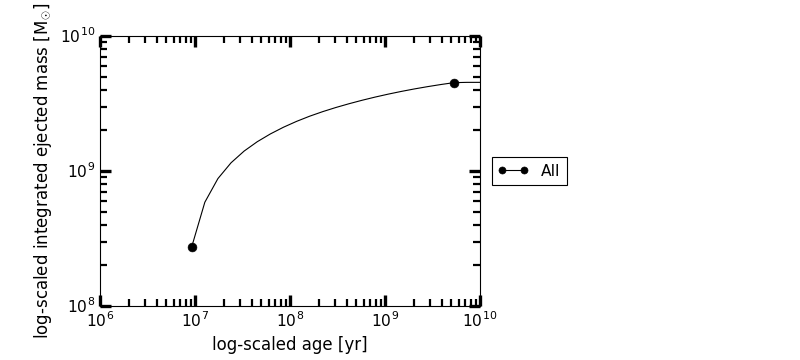

In [6]:
s1.plot_totmasses(fig=1,source='all')

SYGMA traces the (accumulated!) amount of mass ejected by stars which increases over time because more and more stars eject their matter. The value of $10^{11}M_{\odot}$ chosen as the initial gas mass of the cloud will never be reached because a lot of matter is forever locked away inside the stellar remnants.

### Gas mass from different sources

From where is the ejected mass coming from? You can distinguish between three main stellar sources: AGB, masive and SN1a. For that we use other parameter of the plotting function as explained in the online documentation.

<IPython.core.display.Javascript object>


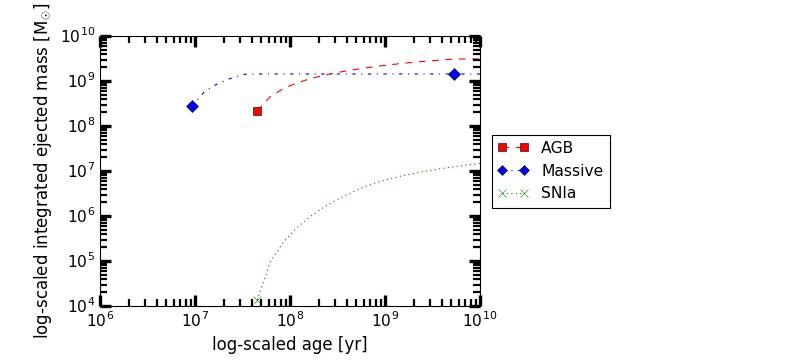

In [7]:
s1.plot_totmasses(fig=2,source='agb')
s1.plot_totmasses(fig=2,source='massive')
s1.plot_totmasses(fig=2,source='sn1a')

First the massive stars eject their matter due to their short lifetime. Later AGB stars and SNIa start to contribute.
After about $3*10^8$ years AGB stars have ejected the most matter.

### Analysis of the composition

One can also analyze the contribution of specific isotopes and elements.
Let us look a the element carbon.

<IPython.core.display.Javascript object>


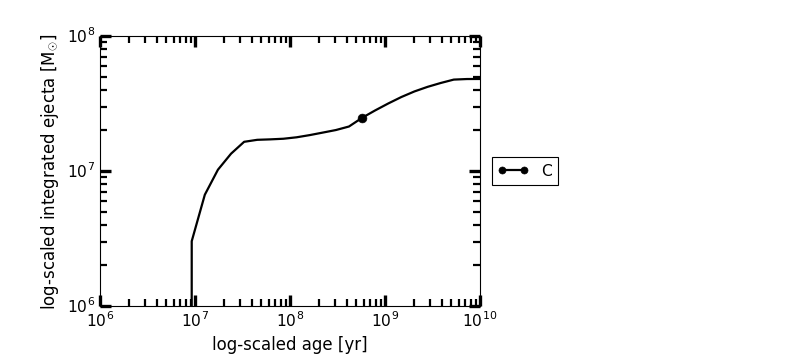

In [8]:
s1.plot_mass(fig=3,specie='C', source='all')

### Spectroscopic notation

You can plot the evolution of isotopes and elements in spectroscopic notation, such as [Fe/H]:

<IPython.core.display.Javascript object>


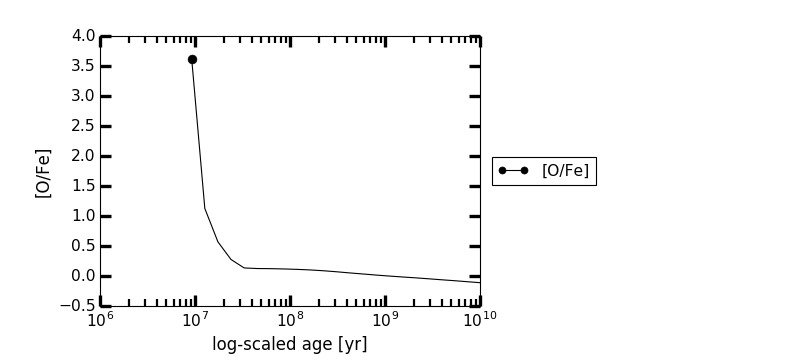

In [9]:
s1.plot_spectro(fig=4,xaxis='age',yaxis='[O/Fe]', source='all')

### Single star sources

To analyse which stars are relevant for the element production you can plot the contribution
of stars of different intial mass. Here you see the total mass contribution for C from each initial mass interval.

<IPython.core.display.Javascript object>


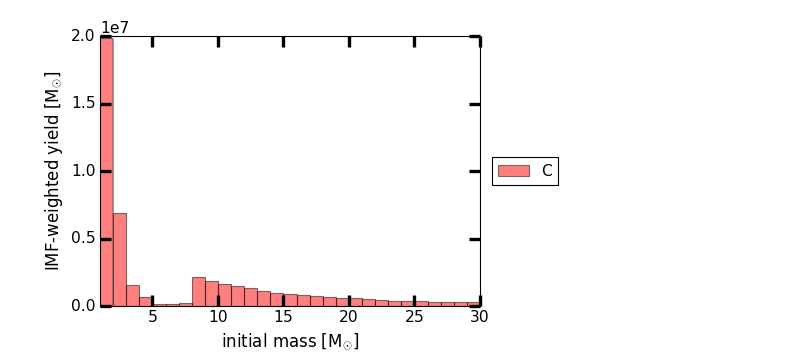

In [11]:
s1.plot_mass_range_contributions(fig=5,specie='C')

The low-mass AGB stars produce the most C while for massive and S-AGB stars the contribution drops.

## 3) Data extraction

To extract how much of elements and isotopes are ejected you can extract tables.  
In the following example the elements H, He and C are extracted and are saved
in the evol_tables directory. 
(If you use this notebook in the WENDI web interface you cannot access the table directly.)

In [12]:
s1.write_evol_table(elements=['H','He','C'])

file gce_table.txt saved in subdirectory evol_tables.


The amount of H, He and C is normalized to the total amount of the gass mass specified initially ($10^{11}M_{\odot}$ in our case.)

## 4) Demonstration of basic capabilities

In the following we show basic capabilities of SYGMA which include changing the IMF, adaptiong the IMF range and changing the delay-time distribution of SNIa.

In [13]:
s2=s.sygma(iniZ=0.0001,tend=1.0e10,mgal=1.3e10,imf_type='chabrier') #default type 'salpeter', change to chabrier IMF

SYGMA run in progress..
   SYGMA run completed - Run time: 0.51s


In [14]:
s3=s.sygma(iniZ=0.0001,tend=1.0e10,mgal=1.3e10,imf_bdys=[2,15]) #default from 1 to 30Msun, changed to 2 to 15Msun

SYGMA run in progress..
   SYGMA run completed - Run time: 0.42s


In [15]:
s4=s.sygma(iniZ=0.0001,tend=1.0e10,mgal=1.3e10,sn1a_on=False) #turning SNIa  off

SYGMA run in progress..
   SYGMA run completed - Run time: 0.6s


For each run you could add here plots introduced in 2) by using the instances s2, s3 and s4.

## 5) How to use own yields

As default SYGMA uses NuGrid's yield tables for AGB and massive stars. Other defaults include the
choice of SNIa yields from <a href="http://adsabs.harvard.edu/abs/1986A%26A...158...17T">Thielemann 1986</a>
and PopIII stars from <a href="http://adsabs.harvard.edu/abs/2010ApJ...724..341H">Heger 2010</a>.
Using your own yield is possible through the download of SYGMA in the NUPCEE platform on the  <a href="http://nupycee.bitbucket.org">NUPCEE web page.</a>

####   The following demonstration can only be done on your local machine.

To use own yields it is necessary to specify the input variable $table = 'yourtablename'$. The table need
to have the NuGrid yield table format which is found in the default yield table file specified with $table='yield\_tables/isotope\_yield\_table.txt'$.
All yield table files are available in the $yield\_tables$ directory. It is necessary to specify
a initial abundance file via the input variable $iniabu\_table$ which must be placed in the $iniabu$ directory
within $yield\_tables$. Note that yield tables and initial abundance files must include the same isotopes. In the following we show a example
with artificial yields with only the species H-1.

In [31]:
smod=s.sygma(iniZ=0.0001,tend=1.0e10,mgal=1.3e10,table='yield_tables/isotope_yield_table_h1.txt',iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_h1.ppn')

SYGMA run in progress..
   SYGMA run completed - Run time: 0.18s


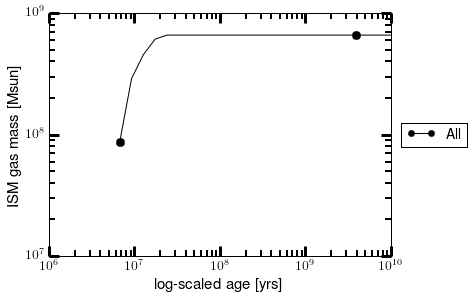

In [30]:
smod.plot_totmasses(fig=6,source='all')